<center>
    <h1>🎮 Video Game Sales Analysis EDA, Visualizations</h1>
</center>
<!--  and Sales Prediction Using Machine Learning Models -->

## Import Necessary Packages

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Visualization Packages Importing
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px
# import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot

# WordCloud Packages
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

<img align="center" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjU3MyvLT2oT-7mMElUQzxHfj8q7y2iompRg&usqp=CAU" alt="Video Game Salary" width="100%"/>

## Data Collection & Loading

In [2]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/videogamesales/vgsales.csv


In [3]:
# Read Data Using read_csv() method
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

Check some random data using `.sample()` method. It will pick the random number of records.

In [4]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2613,2615,Armored Core 2,PS2,2000.0,Simulation,Ubisoft,0.28,0.22,0.23,0.07,0.79
13520,13522,Hyperdimension Neptunia mk2,PSV,2014.0,Action,Compile Heart,0.00,0.00,0.04,0.00,0.04
8074,8076,Dungeon Travelers 2: The Royal Library & The M...,PSV,2014.0,Role-Playing,Atlus,0.07,0.03,0.05,0.03,0.18
2275,2277,Street Hoops,PS2,2002.0,Sports,Activision,0.45,0.35,0.00,0.12,0.91
16109,16112,Paranormal Pursuit: The Gifted One,PC,2015.0,Action,Alawar Entertainment,0.00,0.01,0.00,0.00,0.01


Get the first few records and display it. Let's take some time to overview some data and it's feature names

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Same Here, We can see the last few records for better understanding of datasets records.

In [6]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Here, We can see the shape of the dataset that we are using here. `.shape` attribute will return the tuple with (number of rows and number of columns)

In [7]:
df.shape

(16598, 11)

Let's print the features names with the help of `.columns` attribute. It'll returning `pandas Index` type of list with `dtype` is `object`

In [8]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Data Exploration and Analysis

<img align="center" src="https://i.chzbgr.com/full/8226604032/hD903110C/steam-sales-have-me-on-the-run" alt="Sales Statistics"
     width="100%" />

** Statistical information for all numerical features

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


** Overall information of datasets...

Using this `.info()` method we can see that, it will return the complete details about our dataset behavior. Like 
1. Total Number of records,
* Feature Names,
* Number of missing values,
* What's the datatype for all features, And
* It's memory usage

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


* Now, We need to know how many features are having missing values, So we can easily find the feature name that has `NaN` values.

In [11]:
df.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Here, we have only two features are having missing values, Names are `Year` and `Publisher`.

Firstly, We need to know how many values are missing? So Here, We use some calculations to show the percentage values of missing values features.  

In [12]:
(df.isna().sum() * 100) / df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

We clearly see that, `Year` has `1.63%` of values are actually missing. And, `Publisher` has `3.4%` of values are missing.

### Separate the Numerical And Categorical Features


** Categorical Features are:

In [13]:
# Creating Categorical DataFrame
categorical_df = df.select_dtypes('O')

categorical_df.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


** Numerical Features are:

In [14]:
# Create Numerical DataFrame

numerical_df = df.select_dtypes(('int', 'float'))

numerical_df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


Create a list of Categorical and Numerical Feature from `categorical_df` and `numerical_df`.

In [15]:
categorical_features = categorical_df.columns
print(categorical_features)

print('-' * 60)

numerical_features = numerical_df.columns
print(numerical_features)

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')
------------------------------------------------------------
Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')


#### Analysis for Categorical Features & check the most repetitive values.

In [16]:
# Categorical Features Normalization

for category_name in categorical_features:
    print('-' * 50)
    print("Column Name: ", category_name)
    print(' ' * 50)
    
    print(df[category_name].value_counts().head())
    
    print('-' * 50)
    print('-' * 50)

--------------------------------------------------
Column Name:  Name
                                                  
Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
FIFA 14                         9
Ratatouille                     9
Name: Name, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Platform
                                                  
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Genre
                                                  
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64
--------

### Data Cleaning and Remove NaN values.

Initially, We need to check the `How many number of missing values are there.`

In [17]:

#  Remove Null Values

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

* Here, One feature is numerical and another is categorical featue, So we use `include='all'` to show both feature descriptions

In [18]:
df[['Year', 'Publisher']].describe(include='all')

,Year,Publisher
count,16327.000000,16540
unique,NaN,578
top,NaN,Electronic Arts
freq,NaN,1351
mean,2006.406443,NaN
std,5.828981,NaN
min,1980.000000,NaN
25%,2003.000000,NaN
50%,2007.000000,NaN
75%,2010.000000,NaN


#### Fill Missing Value in year Feature

In [19]:
df.Year = df.Year.fillna(df.Year.mean())

In [20]:
# Change Year dtype to int32
df.Year = df.Year.astype('int32')
df.Year                   

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

#### Fill missing value in Publisher Feature

Here, `Publisher` is a categorical feature so we need to fill the missing values with values which is most repetitive.

So, We use the `.value_counts()` methods to get the value which is continue repeating.

In [21]:
df.Publisher.value_counts(normalize=True)

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
989 Sports                      0.000060
Imadio                          0.000060
UIG Entertainment               0.000060
Men-A-Vision                    0.000060
Tetris Online                   0.000060
Name: Publisher, Length: 578, dtype: float64

- To replace value we can use `mode` to get 'Electronic Arts'.

In [22]:
df.Publisher = df.Publisher.fillna(df.Publisher.mode()[0])

Now, Let's check the datatype for both features.

In [23]:
df[['Publisher','Year']].dtypes

Publisher    object
Year          int32
dtype: object

## Data Visualization

<img align="center" src="https://media.giphy.com/media/1XeAoRH74h7i0MtwCU/giphy.gif" alt="Video Games Sales Visualization" width="100%" />

#### *Showing top 10 Publisher who has published many video games by viewing bar plots*

In [24]:
# Get Top 10 Video Games Publishers
top_10_publishers = df.Publisher.value_counts().head(10)

px.bar(top_10_publishers, title='Top 10 Video Game Pubishers', 
       labels={
           'value': "Number of Games Publishing",
           'index': "Name of the Publisher"
       })


#### *Showing top 10 Video Games Genres that has most playing video games using bar and scatter plots*

In [25]:

# Get Top 10 Video Games Genre
top_10_generes = df.Genre.value_counts()
# top_10_generes

fig =px.bar(top_10_generes, title='Top 10 Video Game Genres', 
       labels={
           'value': "Number of Games Genres",
           'index': "Name of the Genre"
       })

fig.show()


fig = px.scatter(top_10_generes, title='Top Gernres Games',
              labels={
                   'value': "Numbers",
                   'index': "Genre"
               })
fig.show()



# px.bar(top_10_generes.index, top_10_generes.values, title='Top 10 Video Game Genres', 
#        labels={
#            'value': "Numbers",
#            'index': "Genre"
#        })

#### *Showing top 10 Playing Video games Platforms using line plots*

In [26]:

# Get Top 10 Video Games Genre
top_10_platform = df.Platform.value_counts().sort_values()
top_10_platform

fig = px.line(top_10_platform, title='Top Playing Platforms',
              labels={
                   'value': "Counts",
                   'index': "Name of the Platform"
               })

# fig = go.Figure(data=go.Scatter(x= top_10_platform.index, y=top_10_platform.values,
#                                title="Top Playing Platforms"))

fig.show()

In [27]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<img align="center" src="https://media.giphy.com/media/idvY7ibAEvN9bh2rlV/giphy.gif" alt="Video Games Sales Visualization" width="100%"/>

#### *Showing Total Number of Sales (In Millions) for North America, Europe, Japan and Other Country's Sales by Year wise.*

In [28]:
year_wise_sales = df.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).sum()


fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['NA_Sales'],
                  name = "North America's Sales",
                  line_shape='vh'
                 )

fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['EU_Sales'],
                  name = "Europe's Sales",
                  line_shape='vh')

fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['JP_Sales'],
                  name = "Japan's Sales",
                  line_shape='vh')

fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['Other_Sales'],
                  name = "Other Sales",
                  line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]

layout = dict(title = 'Year Wise Total Game Sales of North America, Europe, Japan and Other Country',
              xaxis= dict(title= 'Year' ),
              yaxis= dict(title= 'Total Sales In Millions',)
             )

figure = dict(data = figs, layout = layout)

iplot(figure)



#### *Showing Average Sales (In Millions) By Year for Countries.*

In [29]:
year_wise_sales = df.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).mean()


fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['NA_Sales'],
                  name = "North America's Sales",
                  line_shape='vh'
                 )

fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['EU_Sales'],
                  name = "Europe's Sales",
                  line_shape='vh')

fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['JP_Sales'],
                  name = "Japan's Sales",
                  line_shape='vh')

fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['Other_Sales'],
                  name = "Other Sales",
                  line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]

layout = dict(title = 'Year Wise Average Sales for North America, Europe, Japan and Other Country',
              xaxis= dict(title= 'Year' ),
              yaxis= dict(title= 'Average Sales In Millions',)
             )

figure = dict(data = figs, layout = layout)

iplot(figure)



#### *Showing Year wise Overall Global Sales (In Millions) By Genres With Name of the Game using Scatter Plot.*

In [30]:
# Scatter 

fig = px.scatter(df, x="Year", y="Global_Sales", color="Genre",
                 size='Global_Sales', hover_data=['Name'],
                 title="Year Wise Global Video Game Sales by Genere",
                 labels={'x':'Years', 'y':'Global Sales In Millions'}
                )

fig.show()

#### *Top Ten Video Games Sales by Genre, Publisher and Platforms For All Country using sunburst graph.*

In [31]:
top_sales = df.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

#### *Showing Most repeting word in the dataset for all Categorical values like 'Name', 'Publisher', 'Platform' and 'Genre'.*

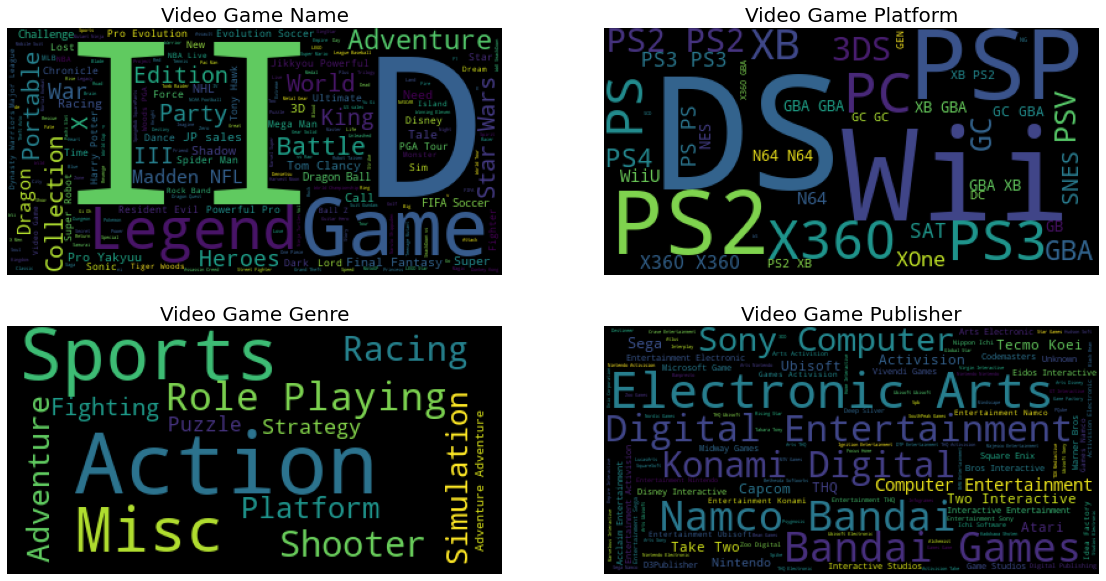

In [32]:

global_sales = df.sort_values(by='Other_Sales', ascending=False)

# plt.subplot(1, 2, 1)


fig = plt.figure(figsize=(17,17))


for index, col,  in enumerate(categorical_features):
    
    plt.subplot(len(categorical_features), 2, index + 1)
    
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        stopwords=stopwords
    ).generate(" ".join(global_sales[col]))

    # Show WordCloud Image
    
    
    plt.imshow(wordcloud)
    plt.title("Video Game " + col, fontsize=20)
    plt.axis('off')
    plt.tight_layout(pad=3)

plt.show()

#### *Displaying the correlation for the numerical feature.*

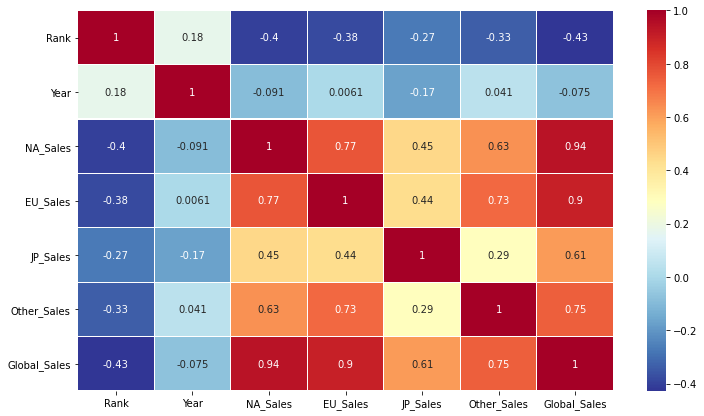

In [33]:
corr_ = df.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()

In [34]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Implementing LabelEncoder

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
data = df.copy()

le = LabelEncoder()

In [37]:
feature = ["Platform", "Genre"]


for col in feature:
    data[col] = le.fit_transform(df[col])
    
    

Let's create train and target feature for train and test splites

In [38]:
X = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = data['Global_Sales'].values

In [39]:
X[:5], y[:5]

(array([[26.  , 10.  , 41.49, 29.02,  3.77,  8.46],
        [11.  ,  4.  , 29.08,  3.58,  6.81,  0.77],
        [26.  ,  6.  , 15.85, 12.88,  3.79,  3.31],
        [26.  , 10.  , 15.75, 11.01,  3.28,  2.96],
        [ 5.  ,  7.  , 11.27,  8.89, 10.22,  1.  ]]),
 array([82.74, 40.24, 35.82, 33.  , 31.37]))

### Splite the data into Train and Test set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13278, 6), (13278,), (3320, 6), (3320,))

## Model Selection

In [43]:
from sklearn.linear_model import LinearRegression

# Import r2 score for Calculation
from sklearn.metrics import r2_score

In [44]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

r2_MultiLinear = r2_score(y_test,pred)



In [45]:

print(r2_MultiLinear)

print(lr.score(X_test, y_test))

0.9999928402231678
0.9999928402231678


### Implementing KNeighbor

In [46]:
#  

from sklearn.neighbors import KNeighborsRegressor


In [47]:
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(y_test,pred))
    


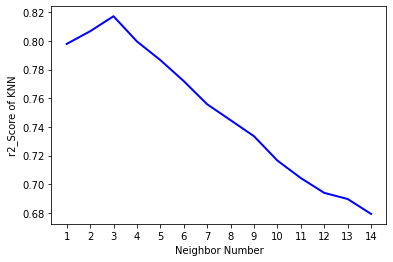

In [48]:

plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()   

In [49]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.817228187755969


### Implementing Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=32)

In [51]:

dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

print(r2_score(y_test, pred))

0.8089825767507645


### Implementing RandomForest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state= 10)

In [53]:
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

print(r2_score(y_test, pred))

0.8224291245938082


### Implementing SVM

In [54]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')

svr_rbf = SVR(kernel='rbf')

In [55]:
svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

pred_linear = svr_linear.predict(X_test)
pred_rbf = svr_rbf.predict(X_test)

print(r2_score(y_test, pred_linear))
print(r2_score(y_test, pred_rbf))

0.9983709152995387
0.4836465140034072


### Implementing XGBoost

In [56]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

In [57]:
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

print(r2_score(y_test, pred))

0.8198180313114781


## Applying HyperParams Tunning 

In [58]:
# DecisionTree Tunning

<img align="center" src="https://i.pinimg.com/originals/69/cb/61/69cb61ef329d954713fea8560892e505.gif" alt="Thanks for Visiting"
     width="100%"/>

--- 
---

<div class="text-center">
    <h1>That's it Guys,</h1>
    <h1>🙏</h1>
    
        
        I Hope you guys you like and enjoy it, and learn something interesting things from this notebook, 
        
        Even I learn a lots of things while I'm creating this notebook
    
        Keep Learning,
        Regards,
        Vikas Ukani.
    
</div>

---
---

<img src="https://static.wixstatic.com/media/3592ed_5453a1ea302b4c4588413007ac4fcb93~mv2.gif" align="center" alt="Thank You" style="min-height:20%; max-height:20%" width="90%" />

